<a href="https://colab.research.google.com/github/Kalazclint/Retail_store-Project/blob/main/Exploratory_Analysis_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [3]:
aisles = "/content/drive/My Drive/Market_Basket_Analysis/aisles.csv"
aisles = pd.read_csv(aisles)
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
order_products_prior = "/content/drive/My Drive/Market_Basket_Analysis/order_products__prior.csv"
order_products_prior = pd.read_csv(order_products_prior)
order_products_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [5]:
reordered_tbl = order_products_prior[order_products_prior['reordered']==1]
reordered_tbl

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
3,2,45918,4,1
5,2,17794,6,1
6,2,40141,7,1
...,...,...,...,...
32434476,3421082,32700,5,1
32434482,3421083,18176,4,1
32434484,3421083,39678,6,1
32434487,3421083,24852,9,1


In [6]:
dept = "/content/drive/My Drive/Market_Basket_Analysis/departments.csv"
dept = pd.read_csv(dept)
dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
orders = "/content/drive/My Drive/Market_Basket_Analysis/orders.csv"
orders = pd.read_csv(orders)
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
orders['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [9]:
order_products_train= "/content/drive/My Drive/Market_Basket_Analysis/order_products__train.csv"
order_products_train = pd.read_csv(order_products_train)
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


# **Joining Tables**

In [10]:
new_data = order_products_train.merge(orders, on=['order_id'])

In [13]:
new_data = new_data.merge(products, on=['product_id'])
new_data

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16
1,816049,49302,7,1,47901,train,14,4,6,16.0,Bulgarian Yogurt,120,16
2,1242203,49302,1,1,2993,train,15,0,7,7.0,Bulgarian Yogurt,120,16
3,1383349,49302,11,1,41425,train,4,3,8,14.0,Bulgarian Yogurt,120,16
4,1787378,49302,8,0,187205,train,5,4,14,30.0,Bulgarian Yogurt,120,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,3420011,1528,12,0,177077,train,4,4,16,30.0,Sprinkles Decors,97,13
1384613,3420084,47935,20,0,9808,train,9,6,21,30.0,Classic Original Lip Balm SPF 12,73,11
1384614,3420084,9491,21,0,9808,train,9,6,21,30.0,Goats Milk & Chai Soap,25,11
1384615,3420088,16380,12,0,72444,train,14,1,8,5.0,Stevia Sweetener,97,13


In [14]:
new_data = new_data.merge(dept, on=['department_id'])

In [15]:
new_data = new_data.merge(aisles, on=['aisle_id'])
new_data

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,yogurt
1,816049,49302,7,1,47901,train,14,4,6,16.0,Bulgarian Yogurt,120,16,dairy eggs,yogurt
2,1242203,49302,1,1,2993,train,15,0,7,7.0,Bulgarian Yogurt,120,16,dairy eggs,yogurt
3,1383349,49302,11,1,41425,train,4,3,8,14.0,Bulgarian Yogurt,120,16,dairy eggs,yogurt
4,1787378,49302,8,0,187205,train,5,4,14,30.0,Bulgarian Yogurt,120,16,dairy eggs,yogurt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,3283540,39484,23,1,103639,train,7,0,20,6.0,Sliced Turkey Feast in Gravy Cat Food,41,8,pets,cat food care
1384613,3339757,24892,1,1,157916,train,4,2,6,22.0,Wild Mackerel & Whitefish Cat Food,41,8,pets,cat food care
1384614,3343813,24892,9,0,43638,train,10,2,15,22.0,Wild Mackerel & Whitefish Cat Food,41,8,pets,cat food care
1384615,3343813,27290,10,0,43638,train,10,2,15,22.0,Purrfect Delicacies Wet Cat Food Flaked Oceanf...,41,8,pets,cat food care


In [16]:
merged_data = new_data.copy()

In [17]:
new_data = new_data.drop(['order_id','user_id','product_id','aisle_id','department_id'], axis =1)
new_data

,add_to_cart_order,reordered,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,department,aisle
0,1,1,train,4,4,10,9.0,Bulgarian Yogurt,dairy eggs,yogurt
1,7,1,train,14,4,6,16.0,Bulgarian Yogurt,dairy eggs,yogurt
2,1,1,train,15,0,7,7.0,Bulgarian Yogurt,dairy eggs,yogurt
3,11,1,train,4,3,8,14.0,Bulgarian Yogurt,dairy eggs,yogurt
4,8,0,train,5,4,14,30.0,Bulgarian Yogurt,dairy eggs,yogurt
...,...,...,...,...,...,...,...,...,...,...
1384612,23,1,train,7,0,20,6.0,Sliced Turkey Feast in Gravy Cat Food,pets,cat food care
1384613,1,1,train,4,2,6,22.0,Wild Mackerel & Whitefish Cat Food,pets,cat food care
1384614,9,0,train,10,2,15,22.0,Wild Mackerel & Whitefish Cat Food,pets,cat food care
1384615,10,0,train,10,2,15,22.0,Purrfect Delicacies Wet Cat Food Flaked Oceanf...,pets,cat food care


In [12]:
products = "/content/drive/My Drive/Market_Basket_Analysis/products.csv"
products = pd.read_csv(products)
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [18]:

order_tbl = orders.merge(order_products_prior, on=['order_id'])
order_tbl

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
...,...,...,...,...,...,...,...,...,...,...
32434484,2977660,206209,prior,13,1,12,7.0,14197,5,1
32434485,2977660,206209,prior,13,1,12,7.0,38730,6,0
32434486,2977660,206209,prior,13,1,12,7.0,31477,7,0
32434487,2977660,206209,prior,13,1,12,7.0,6567,8,0


In [19]:
order_tbl = order_tbl.merge(products, on=['product_id'])
order_tbl

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,1320836,202557,prior,17,2,15,1.0,43553,2,1,Orange Energy Shots,64,7
32434485,31526,202557,prior,18,5,11,3.0,43553,2,1,Orange Energy Shots,64,7
32434486,758936,203436,prior,1,2,7,NaN,42338,4,0,"Zucchini Chips, Pesto",50,19
32434487,2745165,203436,prior,2,3,5,15.0,42338,16,1,"Zucchini Chips, Pesto",50,19


# **Exploratory Analysis**

In [20]:
dept_order_by_hour = order_tbl.groupby(['department_id','order_hour_of_day'])['order_number'].sum().reset_index().sort_values(by= 'order_number', ascending = False)

In [21]:
dept_order_by_hour

,department_id,order_hour_of_day,order_number
82,4,10,14794453
83,4,11,14183934
86,4,14,13779979
81,4,9,13764422
85,4,13,13677539
...,...,...,...
218,10,2,1419
28,2,4,1159
220,10,4,1008
219,10,3,955


In [22]:
dept_order_by_hour = dept_order_by_hour.merge(dept, on=['department_id'])
dept_order_by_hour

,department_id,order_hour_of_day,order_number,department
0,4,10,14794453,produce
1,4,11,14183934,produce
2,4,14,13779979,produce
3,4,9,13764422,produce
4,4,13,13677539,produce
...,...,...,...,...
499,2,1,2224,other
500,2,2,2128,other
501,2,5,1907,other
502,2,4,1159,other


In [23]:
# Pivot the data to have departments as columns and order_hour_of_day as rows
pivot_data = dept_order_by_hour.pivot(index="order_hour_of_day", columns="department", values="order_number")


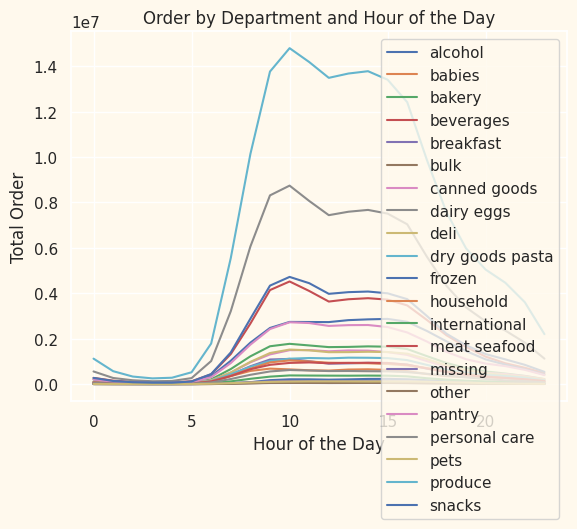

In [24]:
# Create a line plot for each department
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
for department in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[department], label=department)

# Set plot labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Total Order")
plt.title("Order by Department and Hour of the Day")

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [25]:

#Order by hour
order_by_hour = order_tbl.groupby('order_hour_of_day')['order_number'].sum().reset_index().sort_values(by= 'order_number', ascending = False)
order_by_hour

,order_hour_of_day,order_number
10,10,49510070
11,11,47226782
9,9,45824451
14,14,45499707
13,13,45139695
15,15,44560862
12,12,44346154
16,16,41478190
17,17,33486954
8,8,32935579


Text(0.5, 1.0, 'Total Order by Hour of the Day')

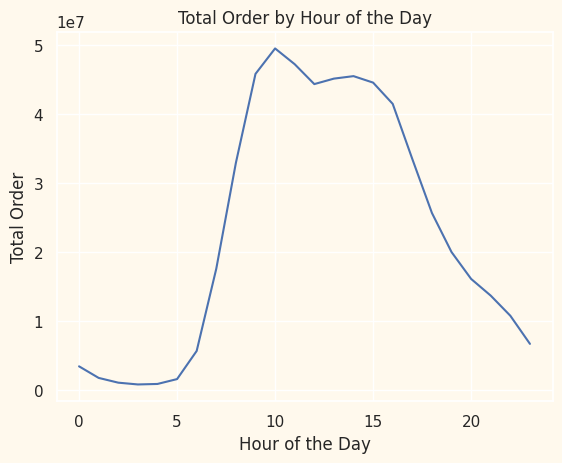

In [26]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
sns.lineplot(x="order_hour_of_day", y="order_number", data= order_by_hour)

# Set plot labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Total Order")
plt.title("Total Order by Hour of the Day")


In [27]:
#Order by the day of the week
order_by_dow = order_tbl.groupby('order_dow')['order_number'].sum().reset_index().sort_values(by= 'order_number', ascending = False)
order_by_dow

,order_dow,order_number
0,0,99446593
1,1,98079835
5,5,75707113
6,6,73561427
2,2,72898860
4,4,68162616
3,3,68137195


Text(0.5, 1.0, 'Total Order by Day of the week')

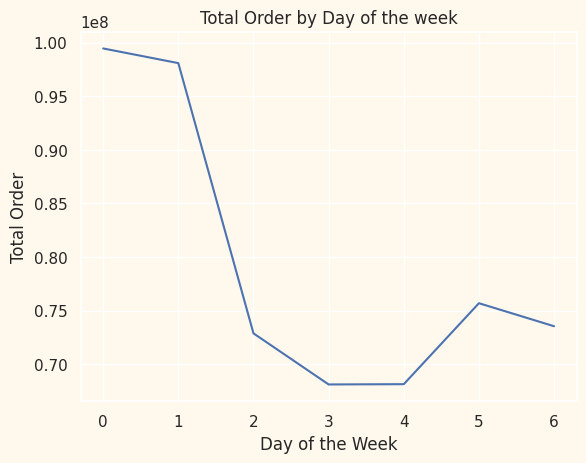

In [28]:
sns.lineplot(x="order_dow", y="order_number", data= order_by_dow)

# Set plot labels and title
plt.xlabel("Day of the Week")
plt.ylabel("Total Order")
plt.title("Total Order by Day of the week")

In [ ]:
#Check most sold product each day of the week
# Group the data by "order_dayofweek" and "product" and calculate the sum of "total_orders"
grouped_data = order_tbl.groupby(["order_dow", "product_name"])["order_number"].sum().reset_index()

,order_dow,product_name,order_number
0,0,#2 Coffee Filters,2319
1,0,#2 Cone White Coffee Filters,2
2,0,#2 Mechanical Pencils,29
3,0,#4 Natural Brown Coffee Filters,776
4,0,& Go! Hazelnut Spread + Pretzel Sticks,390
...,...,...,...
317897,6,with Xylitol Unwrapped Original Flavor 50 Stic...,13
317898,6,with Xylitol Unwrapped Spearmint 50 Sticks Sug...,127
317899,6,with Xylitol Watermelon Twist 18 Sticks Sugar ...,183
317900,6,with a Splash of Mango Coconut Water,88


In [ ]:
# Get the top 10 products for each day of the week
top_10_products = grouped_data.groupby("order_dow")["order_number"].nlargest(10).reset_index(level=0, drop=True)

In [ ]:
# Filter the original data based on the top 10 products
filtered_data = grouped_data[grouped_data["order_number"].isin(top_10_products)]

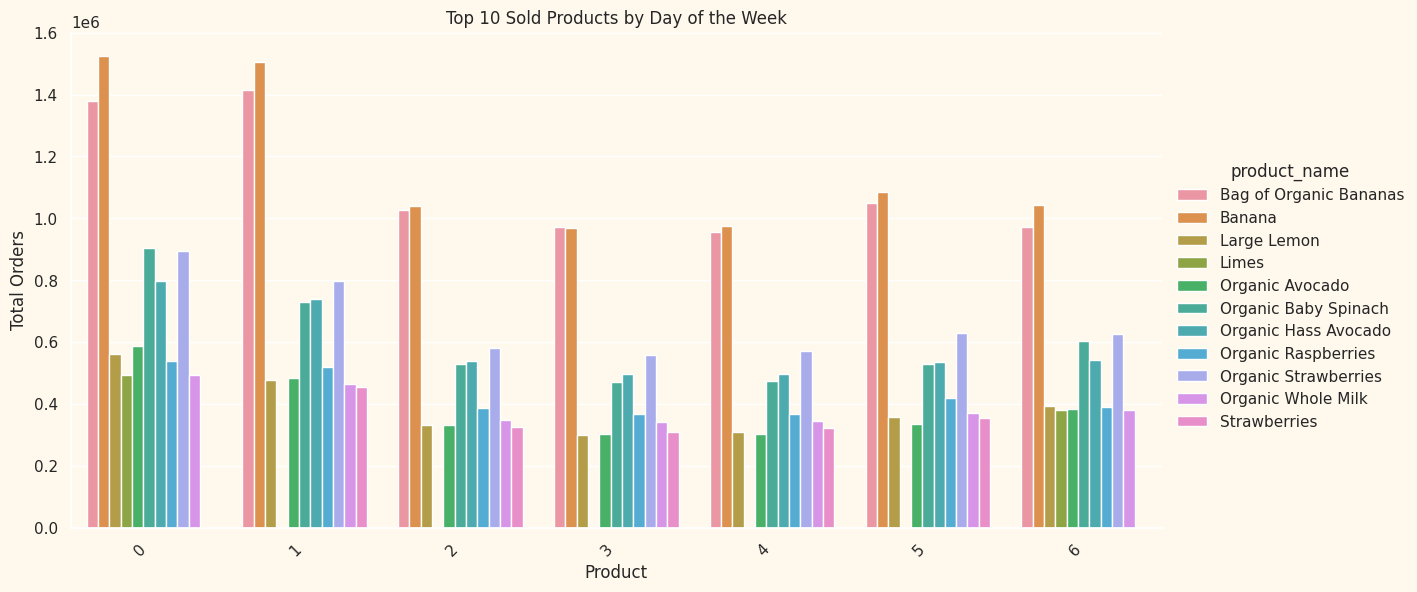

In [ ]:
# Create a bar plot for each day of the week
sns.catplot(x="order_dow", y="order_number", hue="product_name", kind="bar", data=filtered_data, height=6, aspect=2)

# Set plot labels and title
plt.xlabel("Product")
plt.ylabel("Total Orders")
plt.title("Top 10 Sold Products by Day of the Week")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha="right")

# Display the plot
plt.show()

# **Checking Most sold products in each departments**

In [ ]:
new_data.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,yogurt
1,816049,49302,7,1,47901,train,14,4,6,16.0,Bulgarian Yogurt,120,16,dairy eggs,yogurt
2,1242203,49302,1,1,2993,train,15,0,7,7.0,Bulgarian Yogurt,120,16,dairy eggs,yogurt
3,1383349,49302,11,1,41425,train,4,3,8,14.0,Bulgarian Yogurt,120,16,dairy eggs,yogurt
4,1787378,49302,8,0,187205,train,5,4,14,30.0,Bulgarian Yogurt,120,16,dairy eggs,yogurt


In [ ]:
output_file_path = "/content/drive/My Drive/Market_Basket_Analysis/new_data.csv"

In [ ]:
new_data.to_csv(output_file_path, index=False)

In [ ]:
sum_orders_by_department = new_data.groupby(['department', 'product_name'])['order_number'].sum().reset_index()

In [ ]:
# Sort the products within each department by the sum of orders in descending order
top_products_by_department = sum_orders_by_department.groupby('department').apply(lambda x: x.nlargest(10, 'order_number')).reset_index(drop=True)

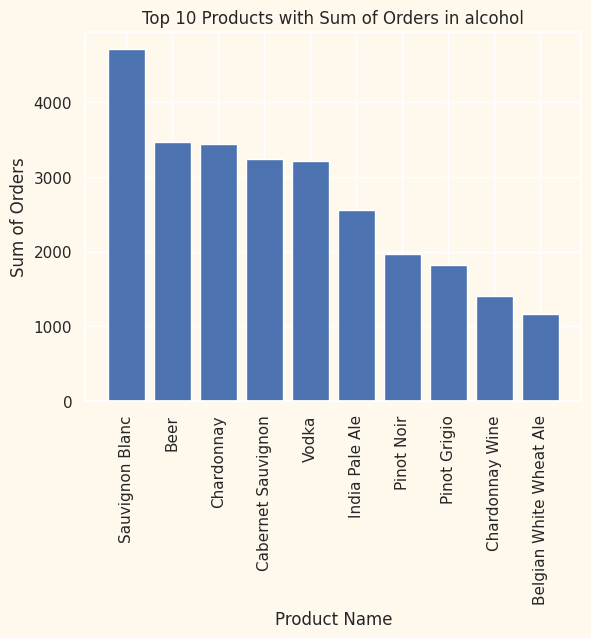

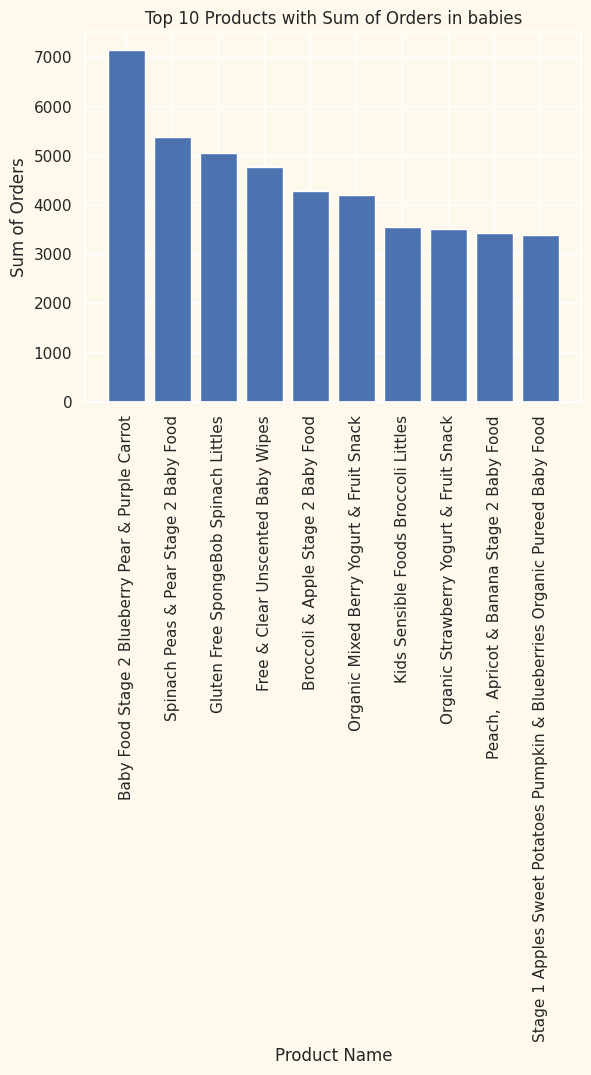

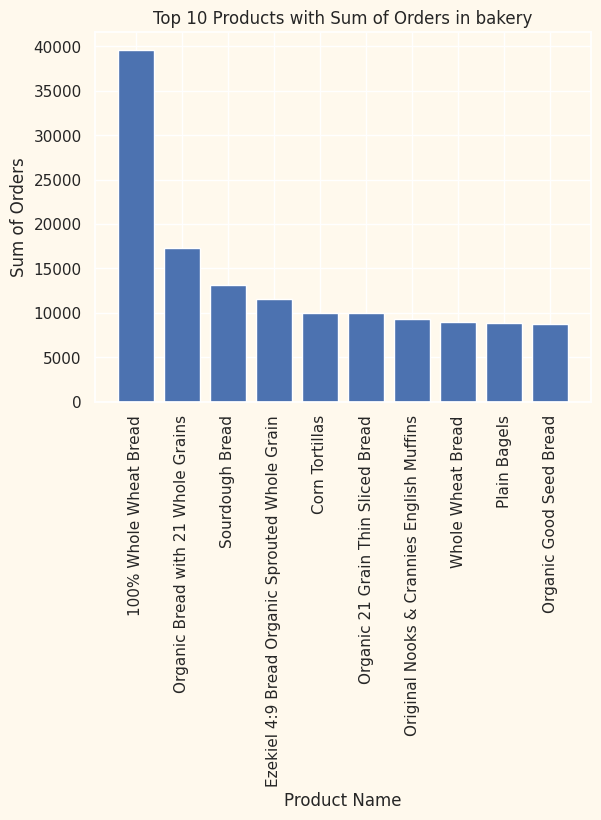

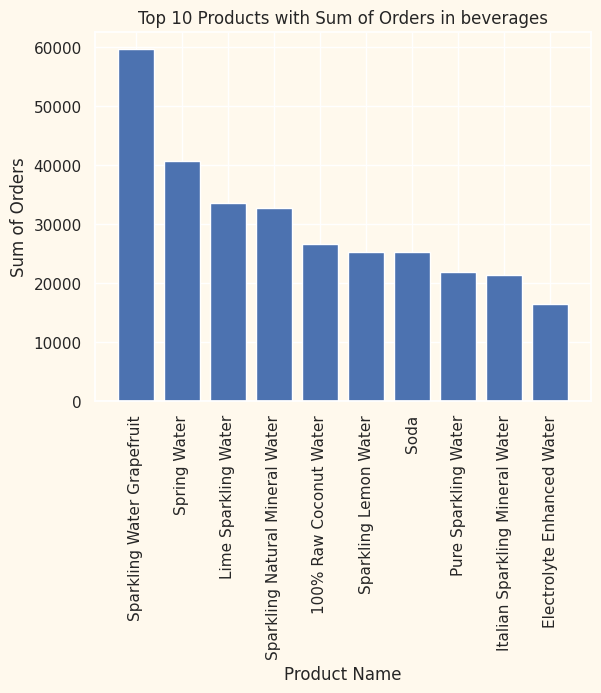

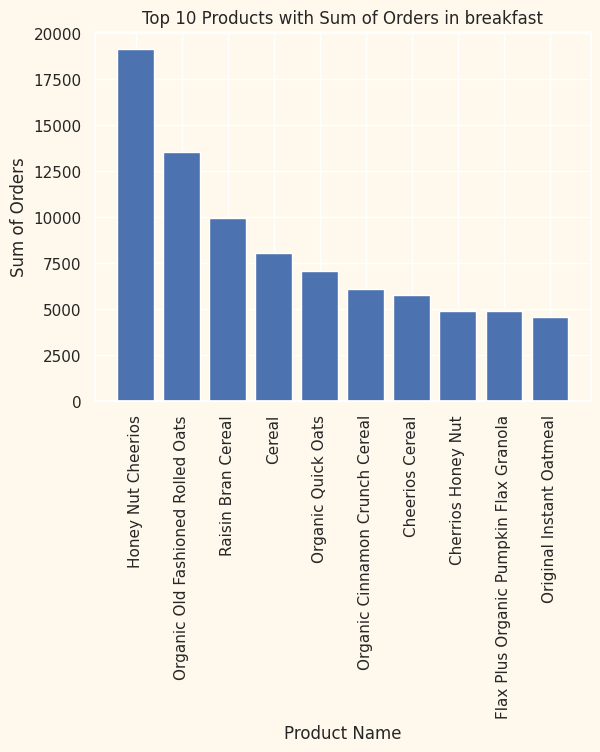

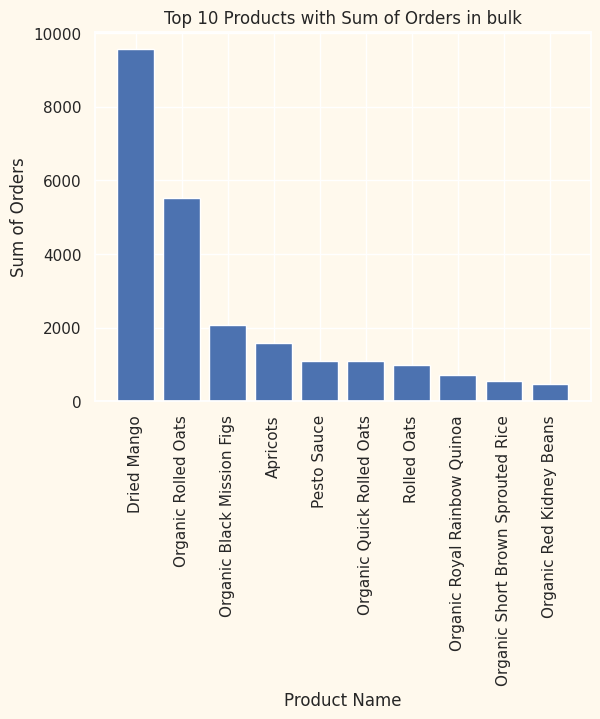

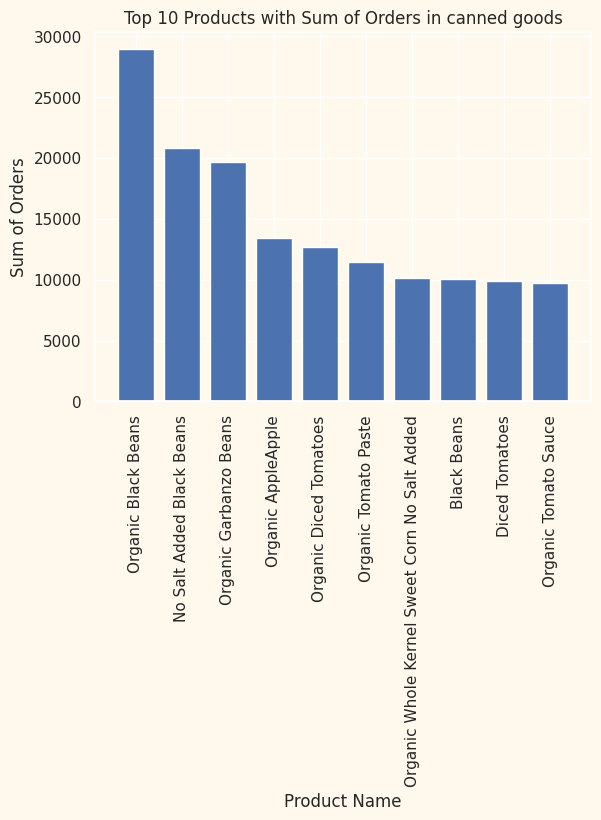

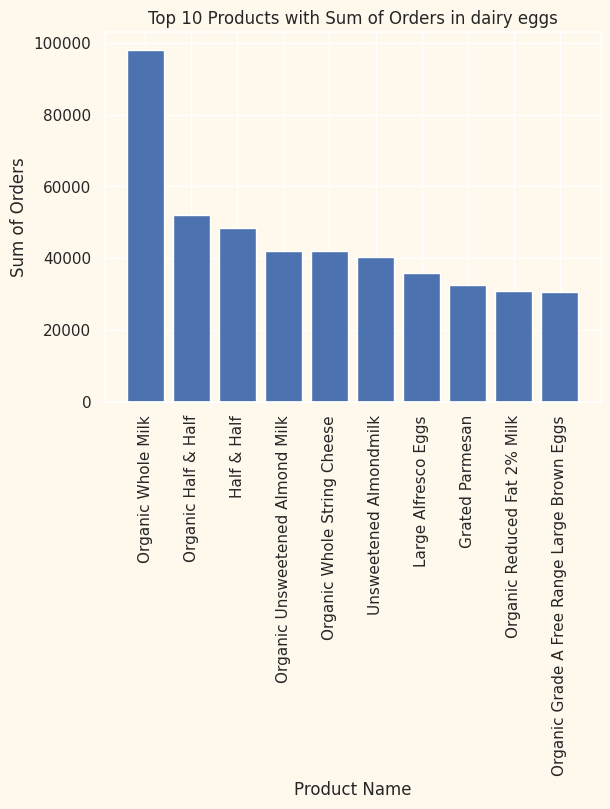

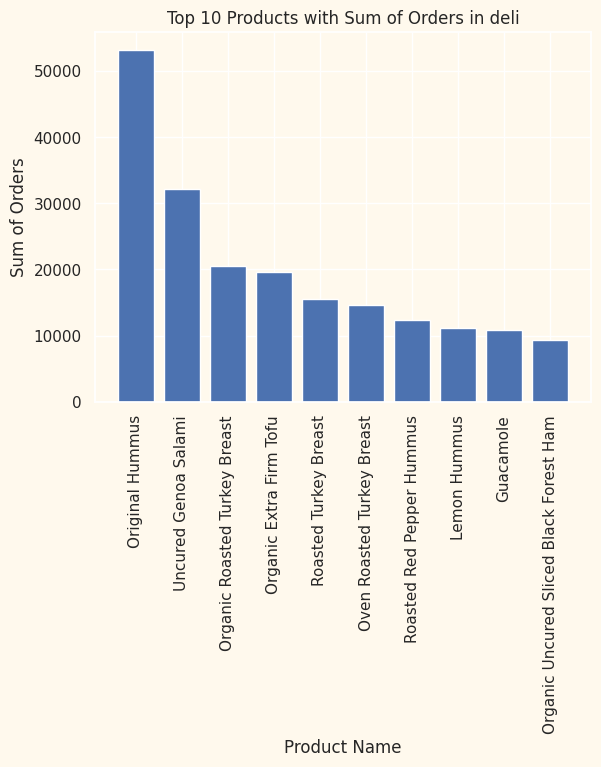

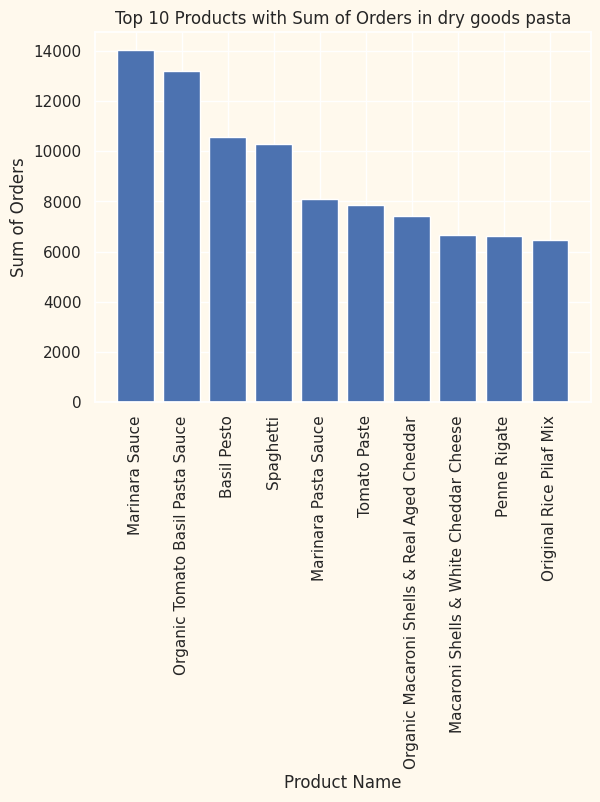

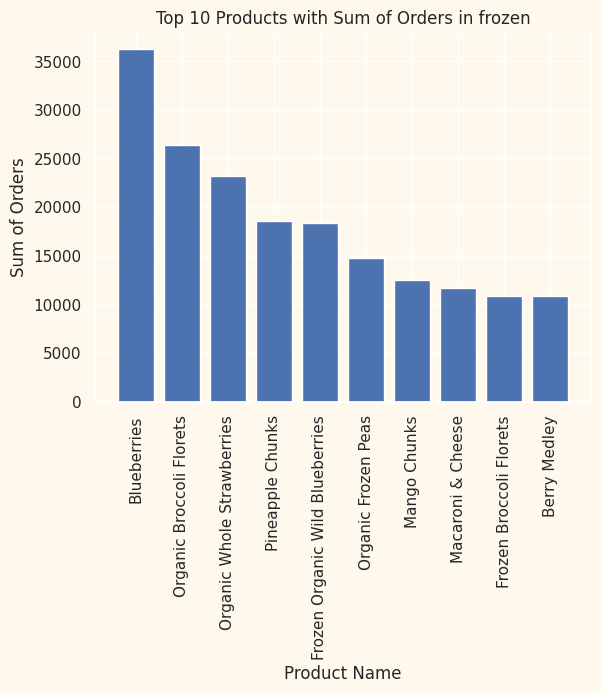

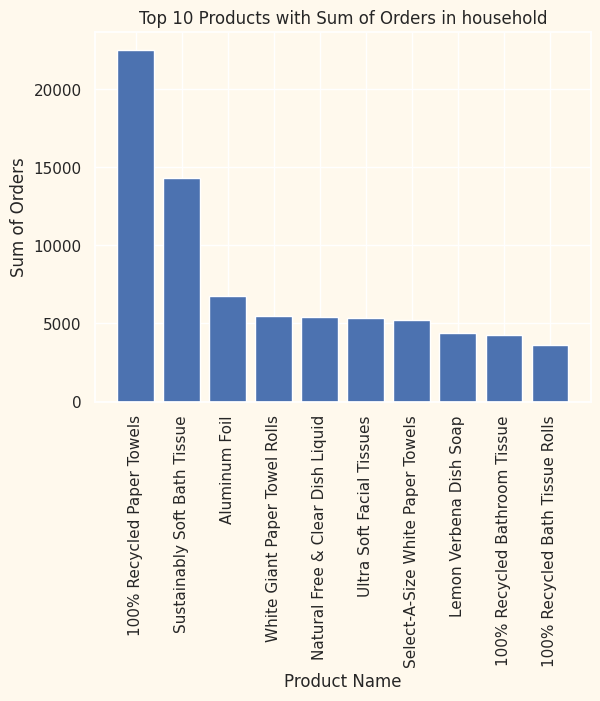

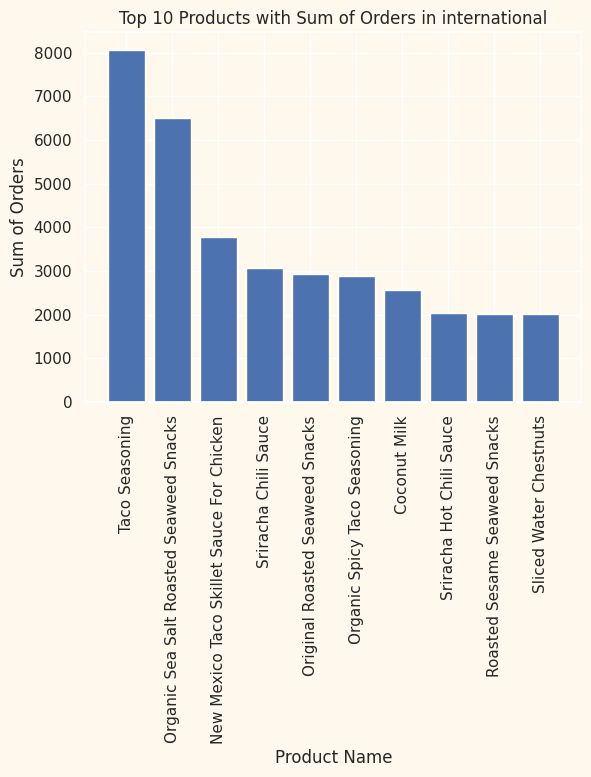

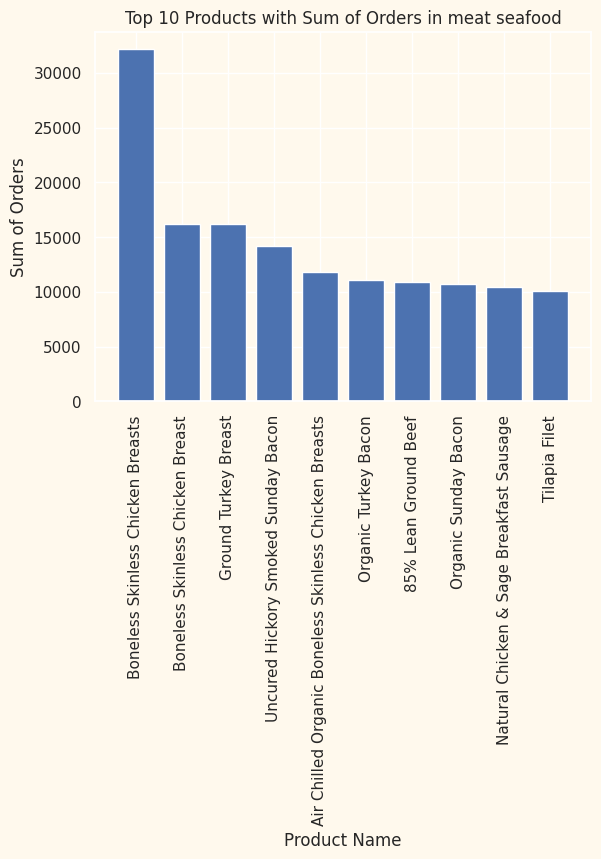

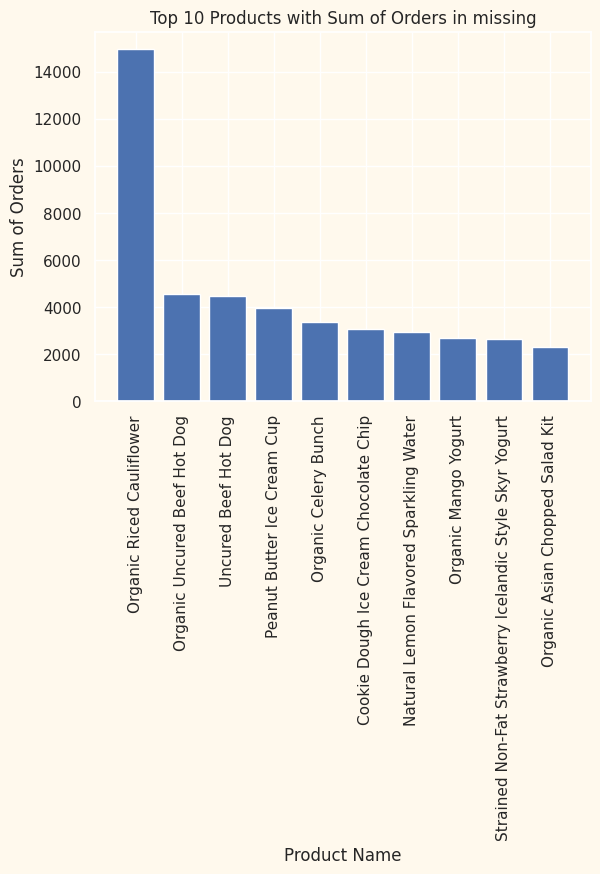

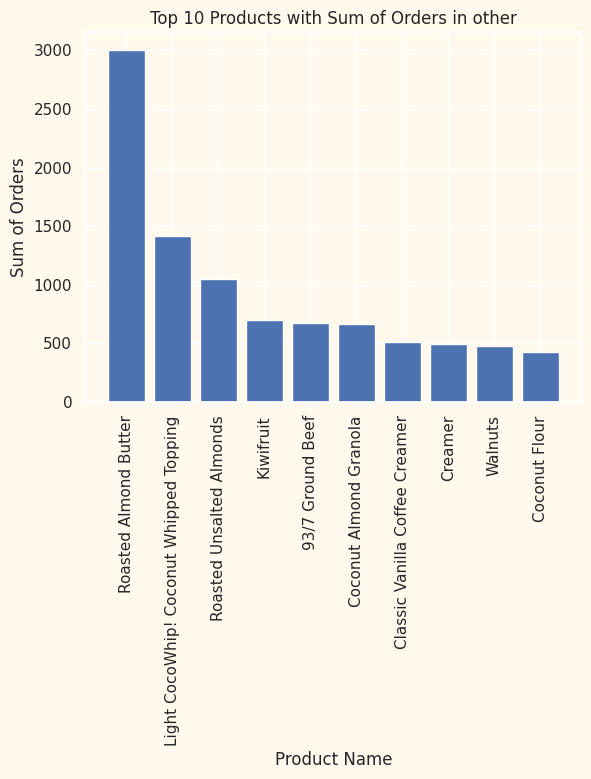

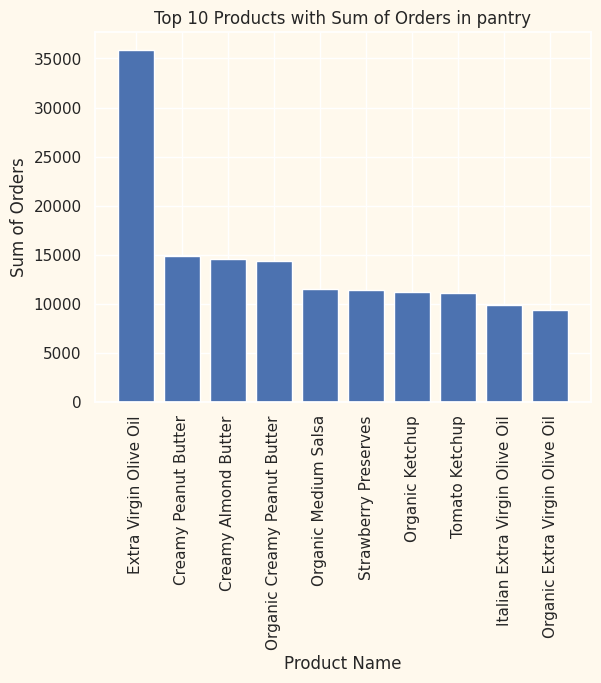

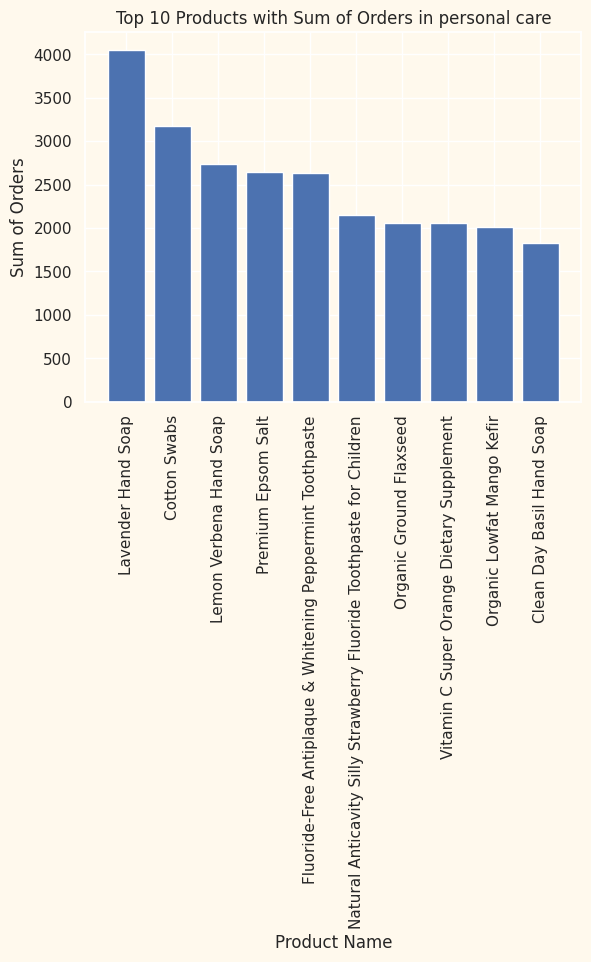

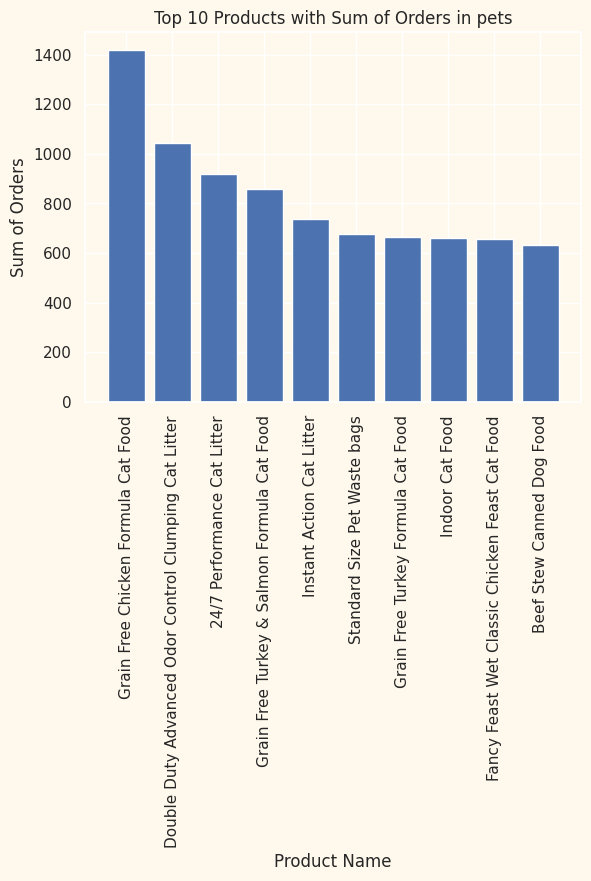

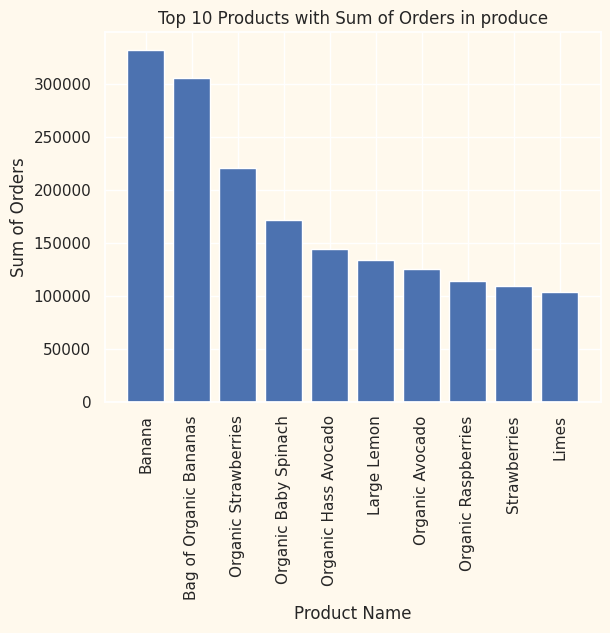

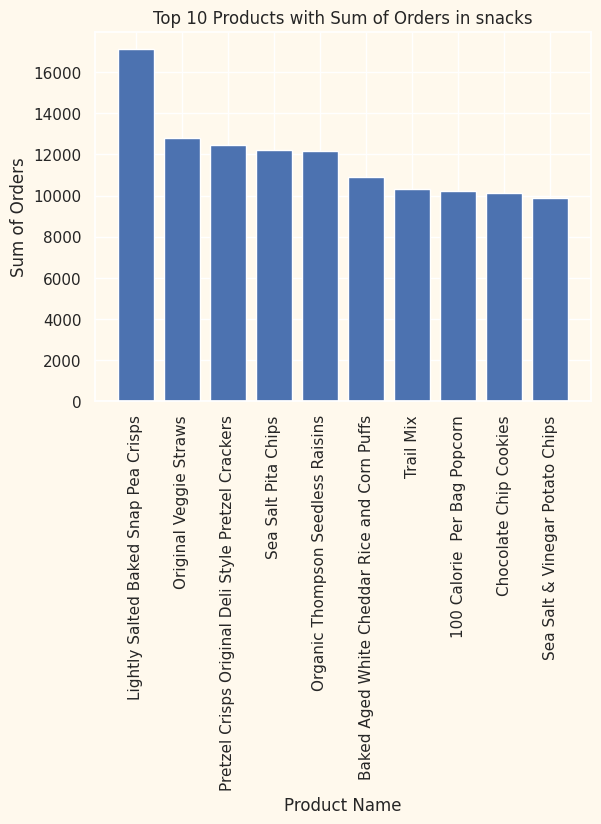

In [ ]:
# Iterate over each department and plot the top 5 products
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
for department in top_products_by_department['department'].unique():
    department_data = top_products_by_department[top_products_by_department['department'] == department]
    products = department_data['product_name']
    order_sums = department_data['order_number']

    plt.figure()
    plt.bar(products, order_sums)
    plt.title(f'Top 10 Products with Sum of Orders in {department}')
    plt.xlabel('Product Name')
    plt.ylabel('Sum of Orders')
    plt.xticks(rotation=90)
    plt.show()






In [ ]:
#Checking Reordered Products
reordered_df = order_tbl[order_tbl['reordered']==1]
reordered_df

# **Data Preparation**

In [ ]:
#Clustering
new_data.head()

,add_to_cart_order,reordered,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,department
0,1,1,train,4,4,10,9.0,Bulgarian Yogurt,dairy eggs
1,7,1,train,14,4,6,16.0,Bulgarian Yogurt,dairy eggs
2,1,1,train,15,0,7,7.0,Bulgarian Yogurt,dairy eggs
3,11,1,train,4,3,8,14.0,Bulgarian Yogurt,dairy eggs
4,8,0,train,5,4,14,30.0,Bulgarian Yogurt,dairy eggs


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 0 to 1384616
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   add_to_cart_order       1384617 non-null  int64  
 1   reordered               1384617 non-null  int64  
 2   eval_set                1384617 non-null  object 
 3   order_number            1384617 non-null  int64  
 4   order_dow               1384617 non-null  int64  
 5   order_hour_of_day       1384617 non-null  int64  
 6   days_since_prior_order  1384617 non-null  float64
 7   product_name            1384617 non-null  object 
 8   department              1384617 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 105.6+ MB


In [ ]:

numerical_features = new_data.select_dtypes(include=['number']).columns
categorical_features = new_data.columns.difference(numerical_features.tolist())

In [ ]:
numerical_features = new_data[numerical_features]
categorical_features = new_data[categorical_features]

In [ ]:
from sklearn.preprocessing import StandardScaler

ss =StandardScaler()

for col in numerical_features.columns:
    numerical_features[col] = ss.fit_transform(numerical_features[[col]]).squeeze()

<ipython-input-22-23ae7e1e56fa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_features[col] = ss.fit_transform(numerical_features[[col]]).squeeze()
<ipython-input-22-23ae7e1e56fa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_features[col] = ss.fit_transform(numerical_features[[col]]).squeeze()
<ipython-input-22-23ae7e1e56fa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [ ]:
#Enconding the CategoricalFeatures
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_features = categorical_features.astype(str).apply(LabelEncoder().fit_transform)

In [ ]:
df = pd.concat([numerical_features, categorical_features], axis = 1)

<Axes: >

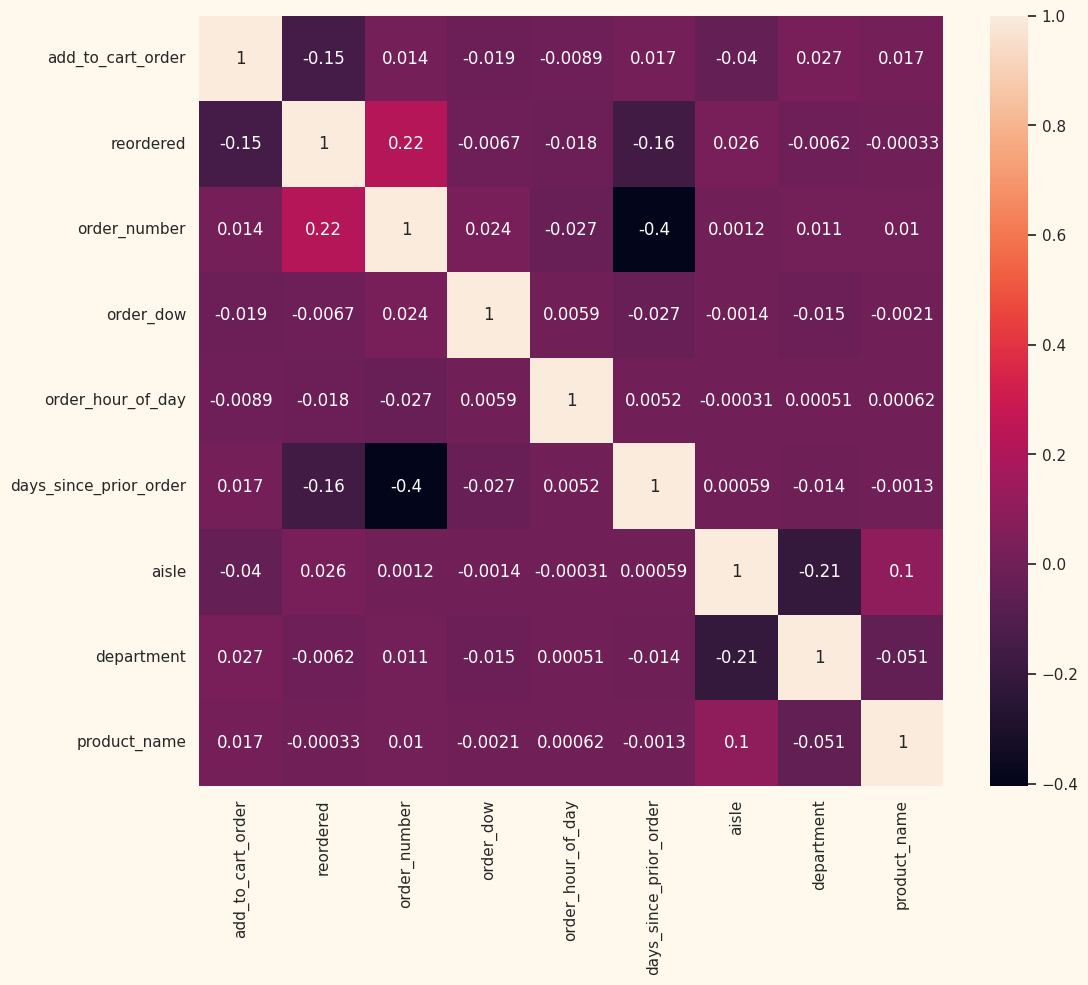

In [ ]:
#Correlation
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(), annot = True)

In [ ]:
corr_mat = df.corr()
for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0
corr_mat.abs().idxmax()


add_to_cart_order                      reordered
reordered                           order_number
order_number              days_since_prior_order
order_dow                 days_since_prior_order
order_hour_of_day                   order_number
days_since_prior_order              order_number
aisle                                 department
department                                 aisle
product_name                               aisle
dtype: object

# **Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

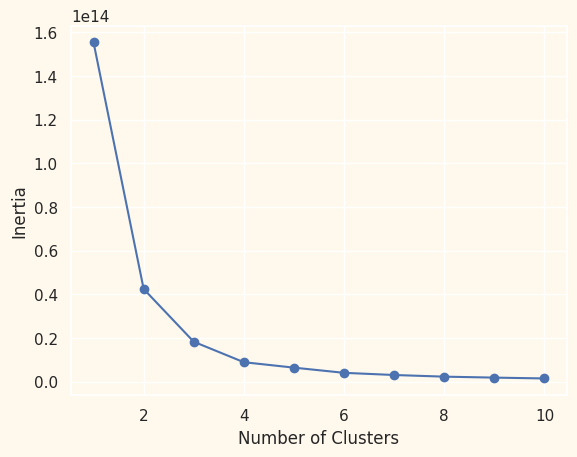

In [ ]:
#Determining number of cluster using Elbow Method
from sklearn.cluster import KMeans
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(df)
    inertia.append(km.inertia_)
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');
### END SOLUTION

In [ ]:
#Clustering with K_means
num_clusters = 4
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
yhat_km = km.fit_predict(df)
new_data["clusters"] = yhat_km

In [ ]:
new_data.head()

,add_to_cart_order,reordered,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,department,aisle,clusters
0,1,1,4,4,10,9.0,Bulgarian Yogurt,dairy eggs,yogurt,3
1,7,1,14,4,6,16.0,Bulgarian Yogurt,dairy eggs,yogurt,3
2,1,1,15,0,7,7.0,Bulgarian Yogurt,dairy eggs,yogurt,3
3,11,1,4,3,8,14.0,Bulgarian Yogurt,dairy eggs,yogurt,3
4,8,0,5,4,14,30.0,Bulgarian Yogurt,dairy eggs,yogurt,3


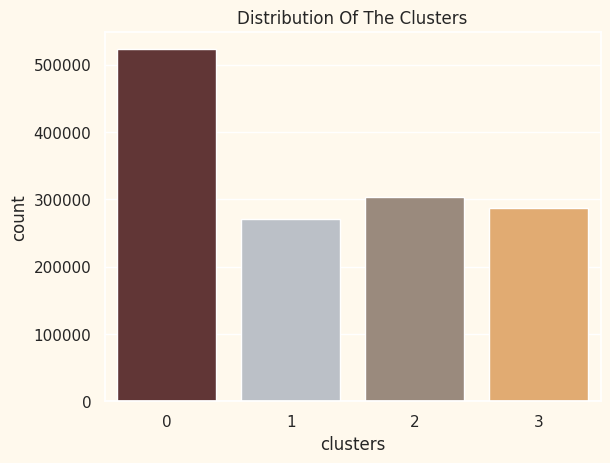

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x= new_data["clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()


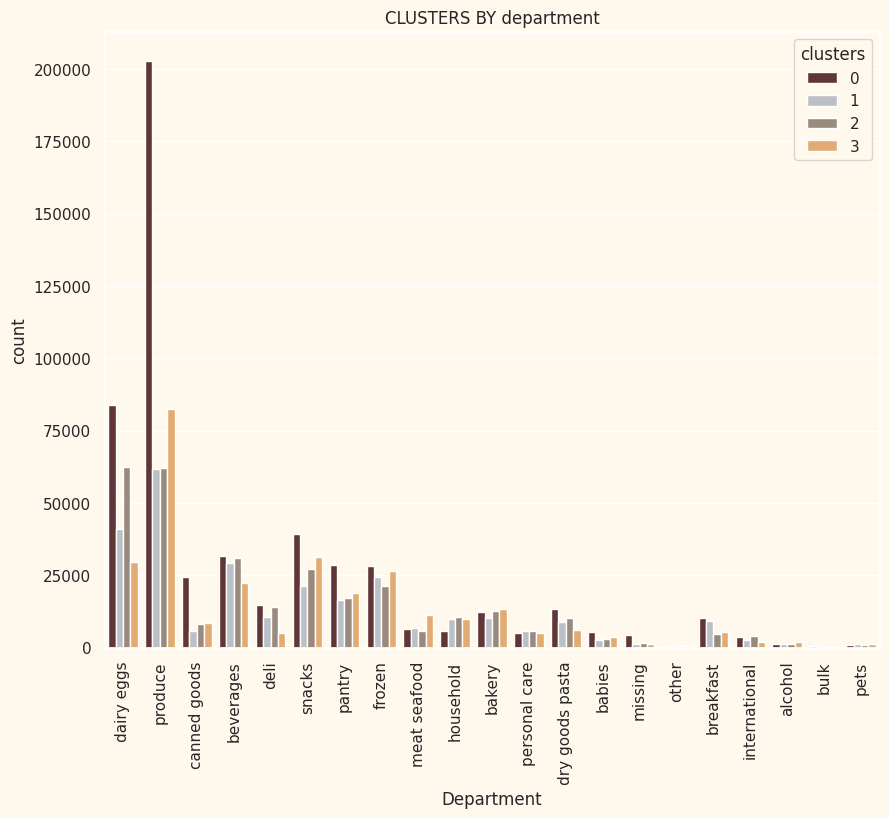

In [ ]:
#How each cluster ordered from departments
fig = plt.figure(figsize=(10,8))
pl = sns.countplot(x=new_data["department"],hue=new_data["clusters"], palette= pal)
pl.set_title("CLUSTERS BY department")
pl.set_xlabel("Department")
plt.xticks(rotation=90)

plt.show()


In [ ]:
new_data['clusters'] = new_data['clusters'].astype(str)

In [ ]:
# Top products ordered by each cluster
cluster_counts = new_data.groupby('clusters')['product_name'].value_counts().reset_index(name='count')


In [ ]:
# Get the top 5 products for each cluster
cluster_counts_sorted = cluster_counts.groupby('clusters').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)


In [ ]:
cluster_counts_sorted

,clusters,product_name,count
0,0,Organic Strawberries,10894
1,0,Organic Baby Spinach,9784
2,0,Organic Avocado,7409
3,0,Organic Hass Avocado,7293
4,0,Organic Raspberries,5546
5,1,Large Lemon,8135
6,1,Limes,6033
7,1,Honeycrisp Apple,3551
8,1,Fresh Cauliflower,2651
9,1,Green Bell Pepper,2521


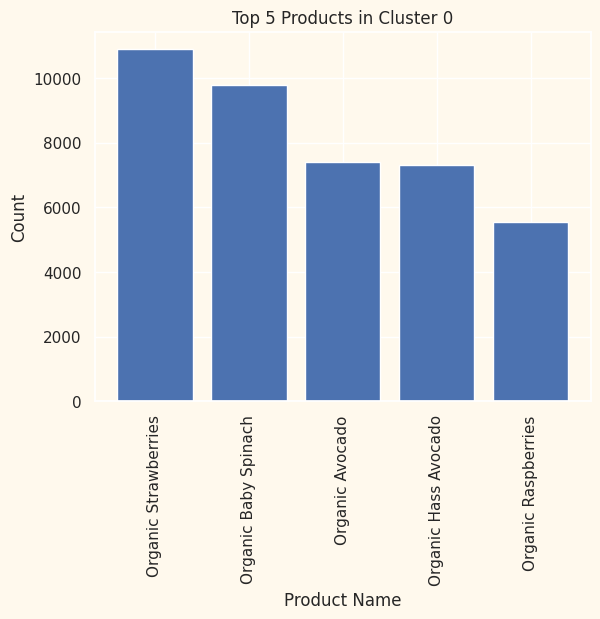

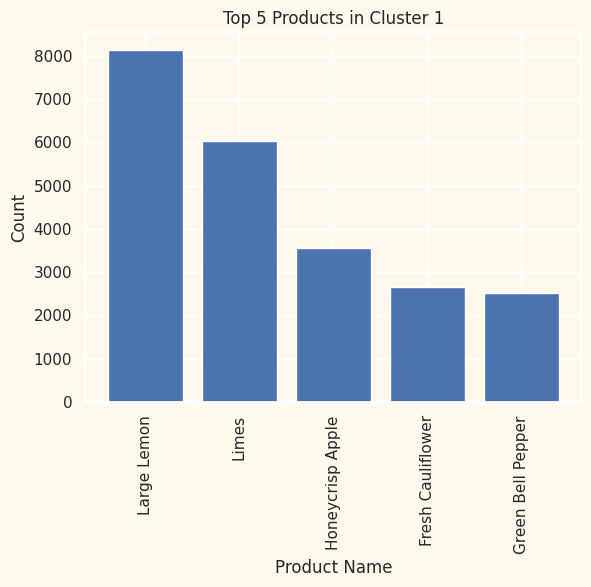

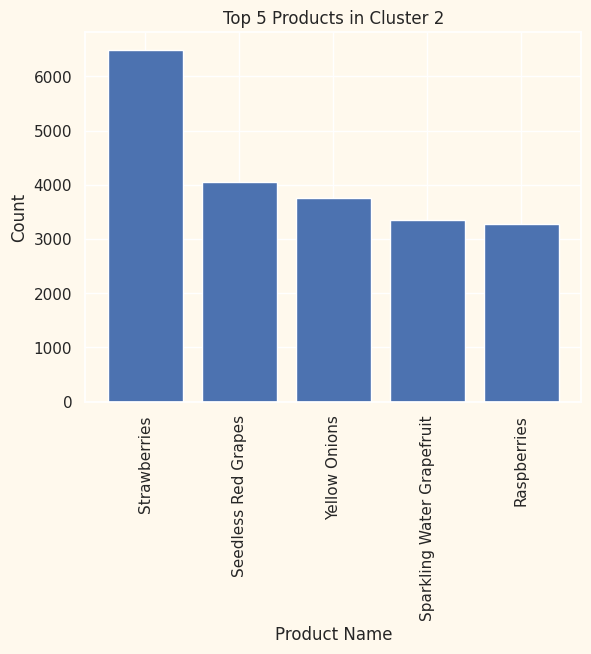

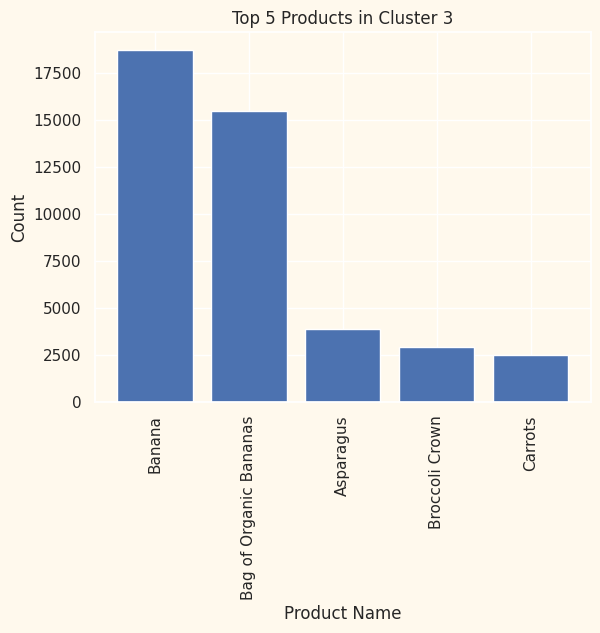

In [ ]:
for cluster in cluster_counts_sorted['clusters'].unique():
    cluster_data = cluster_counts_sorted[cluster_counts_sorted['clusters'] == cluster]
    products = cluster_data['product_name']
    counts = cluster_data['count']

    plt.figure()
    plt.bar(products, counts)
    plt.title(f'Top 5 Products in Cluster {cluster}')
    plt.xlabel('Product Name')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

From the clusters, we can observe that:


*   Customers in Cluster 1 like organic products
*   Customer in Cluster 3 order more fruits like Strawberries, Seedless Red Grapes and Raspberries
*   Cluster 4 ordered mostly Bananas









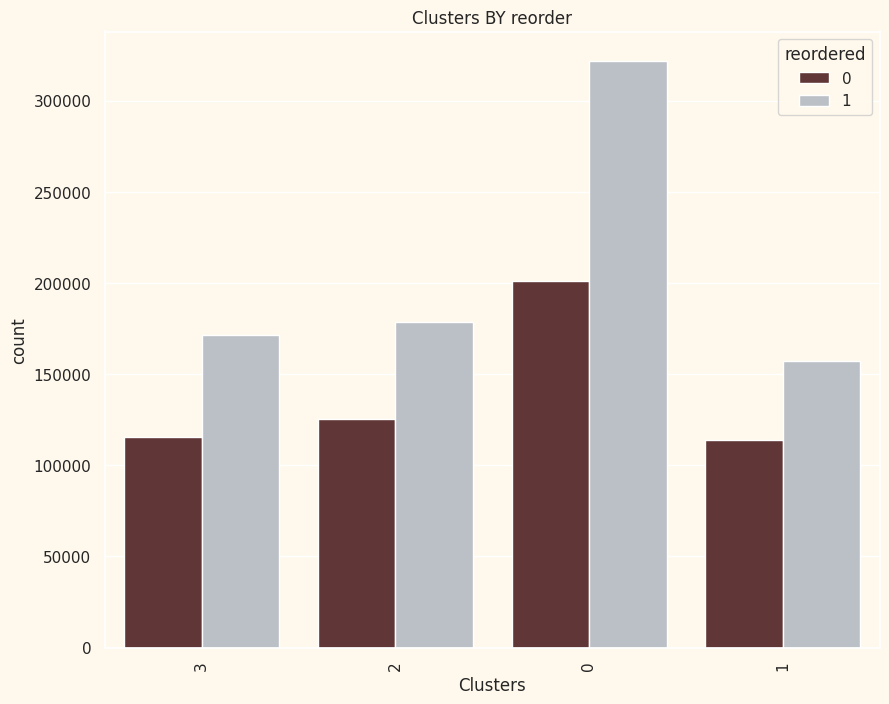

In [ ]:
#Cluster by Reorder
fig = plt.figure(figsize=(10,8))
pl = sns.countplot(x=new_data["clusters"],hue=new_data["reordered"], palette= pal)
pl.set_title("Clusters BY reorder")
pl.set_xlabel("Clusters")
plt.xticks(rotation=90)

plt.show()

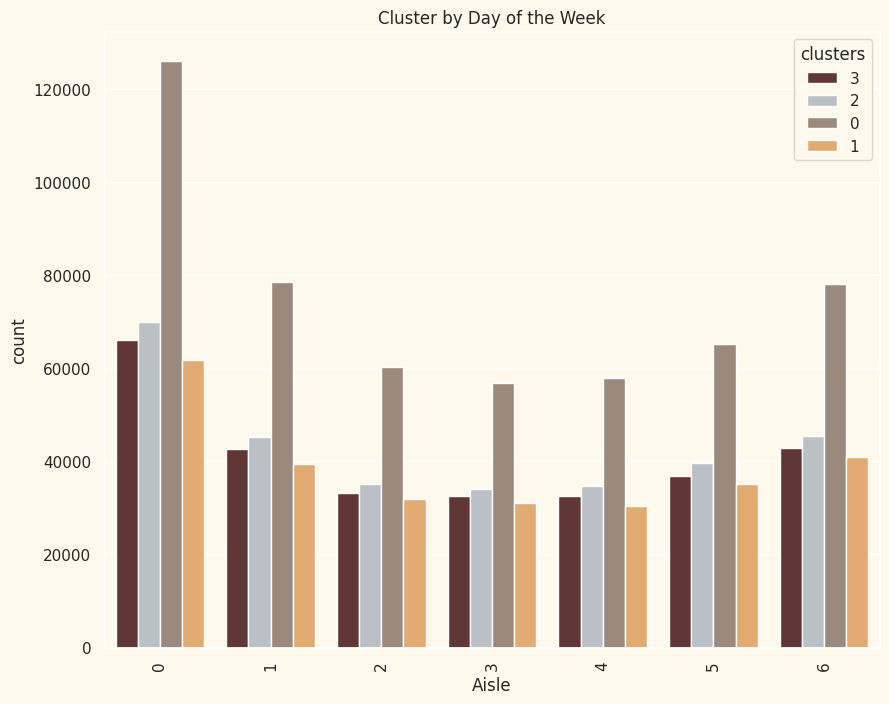

In [ ]:
#Cluster by Aisle
fig = plt.figure(figsize=(10,8))
pl = sns.countplot(x=new_data["order_dow"],hue=new_data["clusters"], palette= pal)
pl.set_title("Cluster by Day of the Week")
pl.set_xlabel("Aisle")
plt.xticks(rotation=90)

plt.show()